In [1]:
import os
import sys
import pickle
import numpy as np
import pandas as pd
from PIL import Image, ImageFilter
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss, confusion_matrix
import matplotlib.pyplot as plt

np.random.seed(100)
LEVEL = 'level_2'

import warnings
warnings.filterwarnings('ignore')

In [2]:
class SigmoidNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def grad_w_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    if y == 0:
      return y_pred * x
    elif y == 1:
      return -1 * (1 - y_pred) * x
    else:
      raise ValueError("y should be 0 or 1")
    
  def grad_b_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    if y == 0:
      return y_pred 
    elif y == 1:
      return -1 * (1 - y_pred)
    else:
      raise ValueError("y should be 0 or 1")
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, loss_fn="mse", display_loss=False):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        if loss_fn == "mse":
          dw += self.grad_w_mse(x, y)
          db += self.grad_b_mse(x, y) 
        elif loss_fn == "ce":
          dw += self.grad_w_ce(x, y)
          db += self.grad_b_ce(x, y)
      self.w -= learning_rate * dw
      self.b -= learning_rate * db
      
      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        if loss_fn == "mse":
          loss[i] = mean_squared_error(Y, Y_pred)
        elif loss_fn == "ce":
          loss[i] = log_loss(Y, Y_pred)
    
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      if loss_fn == "mse":
        plt.ylabel('Mean Squared Error')
      elif loss_fn == "ce":
        plt.ylabel('Log Loss')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

In [3]:
def read_all(folder_path, key_prefix=""):
    '''
    It returns a dictionary with 'file names' as keys and 'flattened image arrays' as values.
    '''
    print("Reading:")
    images = {}
    files = os.listdir(folder_path)
    for i, file_name in tqdm_notebook(enumerate(files), total=len(files)):
        file_path = os.path.join(folder_path, file_name)
        image_index = key_prefix + file_name[:-4]
        image = Image.open(file_path)
        image = image.convert("L")
        images[image_index] = np.array(image.copy()).flatten()
        image.close()
    return images

Level 1

In [4]:
languages = ['ta', 'hi', 'en']

images_train = read_all("Level 1/level_1_train/"+LEVEL+"/"+"background", key_prefix='bgr_') # change the path
for language in languages:
  images_train.update(read_all("Level 1/level_1_train/"+LEVEL+"/"+language, key_prefix=language+"_" ))
print(len(images_train))

images_test = read_all("Level 1/level_1_test/kaggle_"+LEVEL, key_prefix='') # change the path
print(len(images_test))

Reading:


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Level 1/level_1_train/level_2/background'

Level 2

In [5]:
languages = ['ta', 'hi', 'en']

images_train = read_all("Level 2/"+LEVEL+"/"+"background", key_prefix='bgr_') # change the path
for language in languages:
  images_train.update(read_all("Level 2/"+LEVEL+"/"+language, key_prefix=language+"_" ))
print(len(images_train))

images_test = read_all("Level 2/kaggle_"+LEVEL, key_prefix='') # change the path
print(len(images_test))

Reading:


  0%|          | 0/407 [00:00<?, ?it/s]

Reading:


  0%|          | 0/114 [00:00<?, ?it/s]

Reading:


  0%|          | 0/136 [00:00<?, ?it/s]

Reading:


  0%|          | 0/146 [00:00<?, ?it/s]

803
Reading:


  0%|          | 0/299 [00:00<?, ?it/s]

299


In [6]:
images_train

{'bgr_0_d2': array([247,  64,  51,  72,  93, 170, 104,  26, 156,  85,  85, 240,  66,
        226, 215, 149, 213, 107, 183,   0, 176, 134,  12,  74, 222,  28,
        248,  69, 216,  66, 240,  38, 169, 223, 201, 255, 160,  48, 110,
        124, 106,  76, 208, 141, 255,  28, 183,  11, 223,  76,  78,   3,
         47,  96, 224, 223, 236,  17, 112,   3, 235,  94, 199, 170,  56,
        219, 166, 161,   0,  67,  79, 186, 243, 176, 135, 242, 182,  90,
        255, 149, 121, 250, 224,  18, 112,   0, 104,  44,  40,  81,  46,
         15, 138, 238, 222, 119, 131,  63, 190, 128, 234, 241,  13, 170,
        203, 170, 221, 170,   6, 184, 244,  92, 158, 241, 221, 144,  84,
         50, 153, 110,   0,  13, 255, 103, 232, 211,  21, 233, 107, 145,
         79,  23, 147, 217, 121, 168, 141, 109,  57,  59,  63,  37,  57,
          2,  63,  53, 164,  33, 203, 140,  24, 131, 169,   4, 130,   2,
        218, 114,  58, 254,  66, 204, 178, 186, 215, 128,  84, 143, 198,
        177,   4, 142, 155,  41, 181, 1

In [276]:
X_train = []
Y_train = []
for key, value in images_train.items():
    X_train.append(value)
    if key[:4] == "bgr_":
        Y_train.append(0)
    else:
        Y_train.append(1)

ID_test = []
X_test = []
for key, value in images_test.items():
  ID_test.append(int(key))
  X_test.append(value)
  
        
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)

print(X_train.shape, Y_train.shape)
print(X_test.shape)

(803, 256) (803,)
(299, 256)


In [277]:
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

C:\Users\malla\AppData\Local\Temp/ipykernel_7328/2979411657.py:49: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/1000 [00:00<?, ?epoch/s]

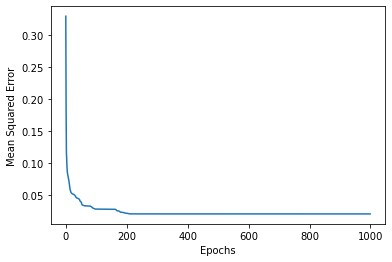

In [278]:
sn_mse = SigmoidNeuron()
sn_mse.fit(X_scaled_train, Y_train, epochs=1000, learning_rate=0.015, loss_fn="mse", display_loss=True)

C:\Users\malla\AppData\Local\Temp/ipykernel_7328/2979411657.py:49: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/500 [00:00<?, ?epoch/s]

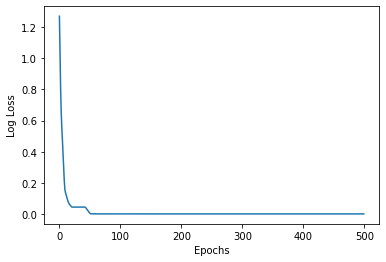

In [313]:
sn_ce = SigmoidNeuron()
sn_ce.fit(X_scaled_train, Y_train, epochs=500, learning_rate=0.01, loss_fn="ce", display_loss=True)

In [280]:
def print_accuracy(sn):
  Y_pred_train = sn.predict(X_scaled_train)
  Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
  accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
  print("Train Accuracy : ", accuracy_train)
  print("-"*50)

In [282]:
print_accuracy(sn_mse)
print_accuracy(sn_ce)

Train Accuracy :  0.9788293897882939
--------------------------------------------------
Train Accuracy :  1.0
--------------------------------------------------


## Sample Submission

In [315]:
Y_pred_test = sn_ce.predict(X_scaled_test)
Y_pred_binarised_test = (Y_pred_test >= 0.5).astype("int").ravel()
submission = {}
submission['ImageId'] = ID_test
submission['Class'] = Y_pred_binarised_test
submission = pd.DataFrame(submission)
#submission = submission.append(pd.DataFrame([[19, 0], [242, 1],[286, 0]], columns = ["ImageId", "Class"]))#.reset_index(drop=True).sort_values(by='ImageId').reset_index(drop=True)
submission = submission[['ImageId', 'Class']]
submission = submission.sort_values(['ImageId'])
#df = pd.DataFrame({'ImageId':[19, 242, 286], 'Class':[0,1,0]})
df = pd.DataFrame({'ImageId':[240], 'Class':[0]})
submission = pd.concat([submission, df])
submission.to_csv("submisision.csv", index=False)